# Titanic Data Analysis

## <u>Introducing the Data Set</u>
The dataset contains demographics and passenger information from 891 of the 2224 passengers and crew on board the Titanic.

### <u>Data Dictionary</u>
|Variable|Definition|Key|
|:--|:--:|--:|
|survival|Survival|0 = No, 1 = Yes|
|pclass|Ticket class|1 = 1st, 2 = 2nd, 3 = 3rd|
|sex|Sex|	
|Age|Age in years|	
|sibsp|# of siblings / spouses aboard the Titanic|	
|parch|# of parents / children aboard the Titanic|	
|ticket|Ticket number|	
|fare|Passenger fare|	
|cabin|Cabin number|
|embarked|Port of Embarkation|C = Cherbourg, Q = Queenstown, S = Southampton|

### <u>Variable Notes</u>
pclass: A proxy for socio-economic status (SES) <br>
1st = Upper <br>
2nd = Middle <br>
3rd = Lower

age: Age is fractional if less than 1. If the age is estimated, is it in the form of xx.5

sibsp: The dataset defines family relations in this way... <br>
Sibling = brother, sister, stepbrother, stepsister <br>
Spouse = husband, wife (mistresses and fiancés were ignored) <br>

parch: The dataset defines family relations in this way... <br>
Parent = mother, father <br>
Child = daughter, son, stepdaughter, stepson <br>
Some children travelled only with a nanny, therefore parch=0 for them. <br>

The above information, as well as other details about the data, including the dataset itself was obtained from - [https://www.kaggle.com/c/titanic/data](https://www.kaggle.com/c/titanic/data)

## <u>Step 1 - Posing the Questions</u> 
According to Kaggle's decription, many passengers and crew lost their lives due to insufficient lifeboats on board and also there were certain groups of people who had a higher probability of survival than others, such as women, children and the upper-class. Thus, with this description as a reference point, the following questions were derived: <br>
<b>
1) Did higher percentage of women and children survive as compared to men? <br>
2) Did age affect your survival chances? <br>
3) Did a higher socio-economic status mean a higher survival rate? <br>
4) Which had a higher percentage of survival? Children with nannies or children with parents?
</b>

*Please note that this report will only cover 4 out of the 5 steps in the data analysis process.

## <u> Step 2 - Data Wrangling </u>

In [1]:
# Imports the different libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Ensure figures renderly directly in notebook and inline
%matplotlib inline

# Reading the titanic data into a DataFrame
titanic_data = pd.read_csv('titanic_data.csv')

# Set default style for plots 
sns.set_style(style='darkgrid')

In [2]:
# Ensures file has been read properly by showcasing first 5 rows of the data
titanic_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
# Length(number of rows) of data set
len(titanic_data)

891

In [4]:
# Checking for any duplicate rows 
titanic_data_no_duplicates = titanic_data.drop_duplicates()
len(titanic_data_no_duplicates)

891

In [5]:
# Determining the number of NaNs in the data
data_null_values = titanic_data.isnull().sum()
print data_null_values
print ''
print 'There are {} blanks in the age data.'.format(data_null_values['Age'])

# Calculates the percentage of the data of the columns with missing values
percent_of_age_no_data = (data_null_values['Age']/881.0) * 100
percent_of_cabin_no_data = (data_null_values['Cabin']/881.0) * 100

print 'This in turn amounts to {}% dataset.'.format(round(percent_of_age_no_data, 2))

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

There are 177 blanks in the age data.
This in turn amounts to 20.09% dataset.


<b> *The percentage of missing data in both the age and especially in the cabin data is a significant amount. As a result of this, it will be appropriate to take into account the above and note that later analysis may not be a true representation of actual events. </b>

In [6]:
# Adds another column specifing the 'Age Category' that passenger belonged to based on his his/her age
min_age = titanic_data['Age'].dropna().min()
max_age = titanic_data['Age'].dropna().max()

bin = [min_age, 17, max_age]
replace = ['Child', 'Adult']

titanic_data['Age_category'] = pd.cut(titanic_data['Age'], bins=bin, labels=replace, include_lowest=True)

# Removing columns that will not be used
titanic_remove_columns = titanic_data.drop(['Name', 'Ticket', 'Cabin', 'Embarked', 'Fare', 'SibSp'], axis=1)
titanic_remove_columns.head()

,PassengerId,Survived,Pclass,Sex,Age,Parch,Age_category
0,1,0,3,male,22.0,0,Adult
1,2,1,1,female,38.0,0,Adult
2,3,1,3,female,26.0,0,Adult
3,4,1,1,female,35.0,0,Adult
4,5,0,3,male,35.0,0,Adult


According to the United Nations Convention, a child is defined as a human being under 18 years of age. Thus, where necessary, this will be taken into account in the following analysis.

In [7]:
# Changes 'Pclass' values from 1,2 and 3 to 'Upper', 'Middle' and 'Lower' respectively
titanic_remove_columns['Pclass'] = titanic_remove_columns['Pclass'].replace(to_replace=[1, 2, 3], value=['Upper', 'Middle', 'Lower'] )

# Drops rows with NaNs so that, if necessary, later calculations would not be affected
titanic_data_cleaned = titanic_remove_columns
titanic_data_no_nans = titanic_data_cleaned.dropna()

## <u> Step 3 - Data Exploration </u>

### <u> Exploring Question 1 and 2 - Women and Children Vs Men Survival Rate / Did Age Matter?</u>

#### Women vs Men Survival Rate

In [8]:
# Some insights into data of Men Vs Women
groupby_sex = titanic_data_cleaned.groupby(by='Sex')
groupby_sex.describe()

Age       Parch  PassengerId    Survived
Sex                                                          
female count  261.000000  314.000000   314.000000  314.000000
       mean    27.915709    0.649682   431.028662    0.742038
       std     14.110146    1.022846   256.846324    0.438211
       min      0.750000    0.000000     2.000000    0.000000
       25%     18.000000    0.000000   231.750000    0.000000
       50%     27.000000    0.000000   414.500000    1.000000
       75%     37.000000    1.000000   641.250000    1.000000
       max     63.000000    6.000000   889.000000    1.000000
male   count  453.000000  577.000000   577.000000  577.000000
       mean    30.726645    0.235702   454.147314    0.188908
       std     14.678201    0.612294   257.486139    0.391775
       min      0.420000    0.000000     1.000000    0.000000
       25%     21.000000    0.000000   222.000000    0.000000
       50%     29.000000    0.000000   464.000000    0.000000
       75%     39.000000    0.000000   680.000000    0.000000
       max     80.000000    5.000000   891.000000    1.000000

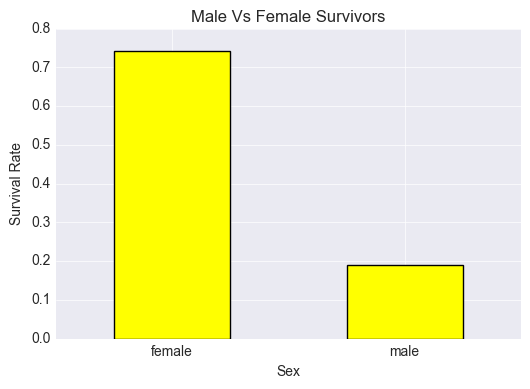

In [9]:
# Shows barplot comparing male and female survivors
groupby_sex = titanic_data_cleaned.groupby('Sex')
plot_1 = groupby_sex['Survived'].mean().plot(kind='Bar', rot=0, color='yellow')
plot_1.set_ylabel('Survival Rate')
plot_1.set_title('Male Vs Female Survivors');

In [10]:
# Shows the number of male and female survivors
groupby_sex['Survived'].sum()

Sex
female    233
male      109
Name: Survived, dtype: int64

As seen in the description of the data and bar chart above, there were more females who survived. The number of females who survived was 233 as compared to only 109 males. As a starting point in this analysis, it can be clearly seen that, and assuming that those who survived all excaped by lifeboats, females were given preferential treatment with regards to escaping on them. Now let's take a closer look by separating passengers in terms of age.

#### Child vs Women Vs Men

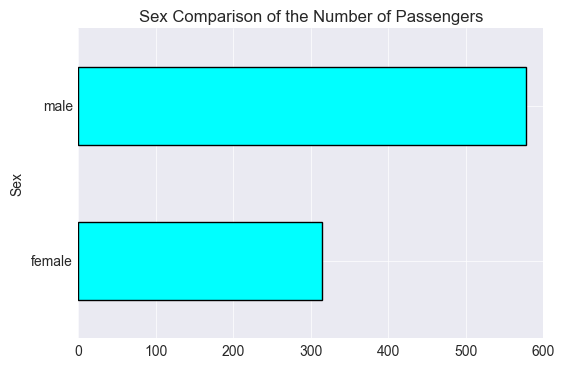

In [11]:
# Visual representation of the number of female vs male passengers onboard the titanic
plot_2 = titanic_data_cleaned.groupby('Sex')['PassengerId'].count().plot(kind='barh', color='cyan')
plot_2.set_title('Sex Comparison of the Number of Passengers');

In [12]:
# Function that ounts the number of passengers 
def passenger_count(data, select, value):
    count = data[data[select] == value]
    return len(count)

count_females = passenger_count(titanic_data_cleaned, 'Sex', 'female')
count_males = passenger_count(titanic_data_cleaned, 'Sex', 'male')

print 'The number of females on board was {}'.format(count_females)
print 'The number of males on board was {}'.format(count_males)

The number of females on board was 314
The number of males on board was 577


As seen above there are more male than females passengers. This needs to be taken into account as it may in some ways affect and skew the analysis.

In [13]:
# Calculates of females and males with missing data
age_null_values = pd.isnull(titanic_data_cleaned['Age'])
sex_with_null_values = titanic_data_cleaned['Sex'][age_null_values]
missing_female_data = sex_with_null_values[sex_with_null_values == 'female'].count()
missing_male_data = sex_with_null_values[sex_with_null_values == 'male'].count()

print 'The number of missing age data for females and males are {} and {} respectively.'.format(missing_female_data, missing_male_data)

The number of missing age data for females and males are 53 and 124 respectively.


Before we dive in, it is important to take note of the missing age data as shown above, as this also may scale the analysis toward a certain conclusion.

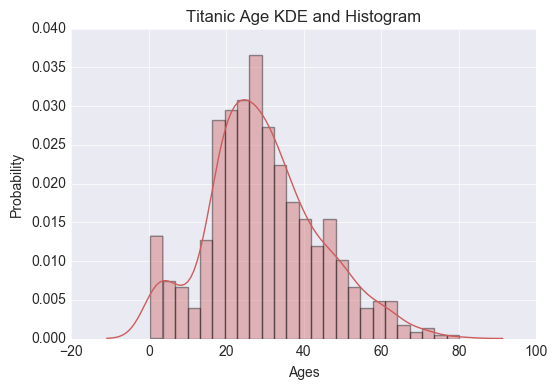

In [14]:
# Histogram and KDE Plot of the Ages of Survivors of the Titanic
plot_3 = sns.distplot(titanic_data_no_nans['Age'], bins=25, color='indianred', hist=True, kde=True)
plot_3.set_xlabel('Ages')
plot_3.set_ylabel('Probability')
plot_3.set_title('Titanic Age KDE and Histogram');

The combined histogram and kernel density estimation plot above gives some insight into the passenger age distribution on the titanic. Now let us take a look further at the density estimates of surviving and non-surviving passengers of the different ages.

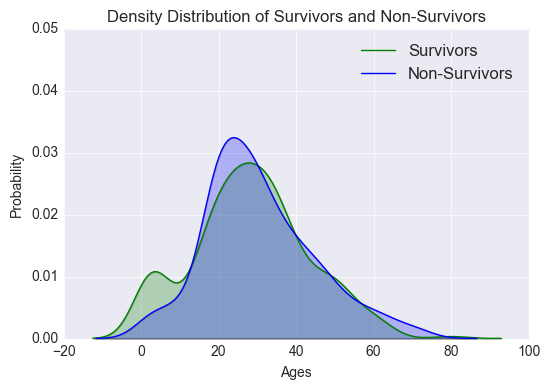

In [15]:
# Plots a KDE to compare surviving and non-surviving passengers
plot_4 = sns.kdeplot(titanic_data_no_nans['Age'][titanic_data_no_nans['Survived'] == 1], label = 'Survivors', shade=True, color='green')
plot_5 = sns.kdeplot(titanic_data_no_nans['Age'][titanic_data_no_nans['Survived'] == 0], label = 'Non-Survivors', shade=True)
plt.ylim(0, 0.05)
plt.title('Density Distribution of Survivors and Non-Survivors')
plt.xlabel('Ages')
plt.ylabel('Probability');

The above plot showcases the kernel density distribution of the different ages between survivors and non-survivors. As the plots are almost identical, the probability of age affecting the chances of survival for the passengers onboard is relatively low.

In [16]:
# The number of missing age data
missing_ages = titanic_data_cleaned['Age'].isnull().sum()
print 'The number of missing age data is {}.'.format(missing_ages)

The number of missing age data is 177.


In [17]:
# Selecting data with no missing ages 
non_missing_ages = titanic_data_cleaned['Age'].notnull()
titanic_data_age = titanic_data_cleaned[non_missing_ages]

titanic_data_age.head(10)

,PassengerId,Survived,Pclass,Sex,Age,Parch,Age_category
0,1,0,Lower,male,22.0,0,Adult
1,2,1,Upper,female,38.0,0,Adult
2,3,1,Lower,female,26.0,0,Adult
3,4,1,Upper,female,35.0,0,Adult
4,5,0,Lower,male,35.0,0,Adult
6,7,0,Upper,male,54.0,0,Adult
7,8,0,Lower,male,2.0,1,Child
8,9,1,Lower,female,27.0,2,Adult
9,10,1,Middle,female,14.0,0,Child
10,11,1,Lower,female,4.0,1,Child


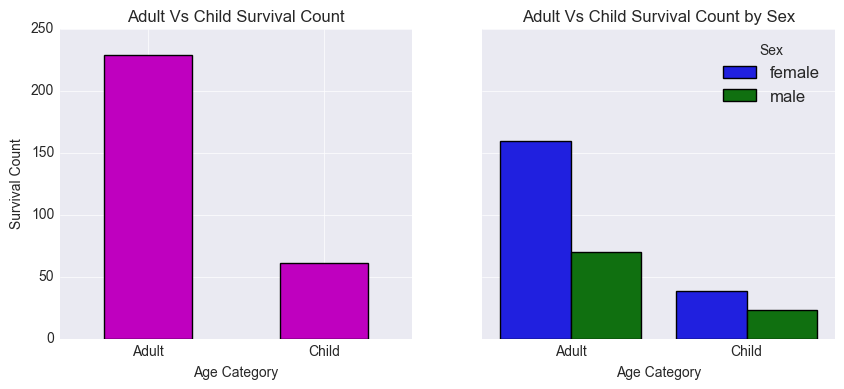

In [18]:
# Grouping the data by age and sex / Plot relevant graphs
titanic_survivor = titanic_data_age[titanic_data_age['Survived'] == 1]
titanic_age_and_sex = titanic_survivor.groupby(['Age_category', 'Sex'])
fig, axs = plt.subplots(nrows=1, ncols=2, sharey=True, figsize=(10,4))

child_and_adult = titanic_survivor['Age_category'].value_counts()
plot_6 = child_and_adult.plot(kind='bar', ax=axs[0], rot=0, color="m")
plot_6.set_ylabel('Survival Count')
plot_6.set_title('Adult Vs Child Survival Count')
plot_6.set_xlabel('Age Category')

plot_7 = sns.countplot(x='Age_category', hue='Sex', data=titanic_survivor, order=['Adult', 'Child'])
plot_7.set_title('Adult Vs Child Survival Count by Sex')      
plot_7.set_xlabel('Age Category');

In [19]:
titanic_age_and_sex['Survived'].sum()

Age_category  Sex   
Child         female     38
              male       23
Adult         female    159
              male       70
Name: Survived, dtype: int64

As seen in the chart and description above, there were more than two times as many female adult survivors than male adult survivors. There were not as many children on board the titanic as adults, hence, although it is shocking not more children survived, their low survival rate as a whole. However, even amoung children there was a slightly higher number of female child survivors as compared to males.

In [20]:
# Selects the appropriate data and uses the function to return the survival percentage of the appropriate groups of people
def get_total(data, sex, gender):
    datapoints = data[data[sex] == gender]
    return datapoints

def percentage_survival(survived, total):
    percentage = (float(survived)/total) * 100
    return round(percentage, 2)

titanic_adults = get_total(titanic_data_age, 'Age_category', 'Adult')

female_adults = len(get_total(titanic_adults, 'Sex', 'female'))
male_adults = len(get_total(titanic_adults, 'Sex', 'male'))
titanic_children = len(get_total(titanic_data_age, 'Age_category', 'Child'))


female_survivors = get_total(titanic_survivor, 'Sex', 'female')
male_survivors = get_total(titanic_survivor, 'Sex', 'male')

female_adult_survivors = len(female_survivors[female_survivors['Age_category'] == 'Adult'])
male_adult_survivors = len(male_survivors[male_survivors['Age_category'] == 'Adult'])
child_survivors = len(get_total(titanic_survivor, 'Age_category', 'Child'))

print '{}% of adult males survived.'.format(percentage_survival(male_adult_survivors, male_adults))
print '{}% of adult females survived.'.format(percentage_survival(female_adult_survivors, female_adults))
print '{}% of chidren survived'.format(percentage_survival(child_survivors, titanic_children))

17.72% of adult males survived.
77.18% of adult females survived.
53.98% of chidren survived


As seen in the calculations above, there was a higher percentage of the total adult female and child passengers compared to male passengers. Thus, it can be assumed that females and children were given priority to board the lifeboards and, hence, survive.

In [21]:
# Calculates the correlation between age and survival rate
correlation_age_and_survival = titanic_data_cleaned['Survived'].corr(titanic_data['Age'])

print 'The correlation between the age and survival rate of passengers is {}.'.format(round(correlation_age_and_survival, 2))

The correlation between the age and survival rate of passengers is -0.08.


Gender is a significant factor to survive on the titanic, however, age is insignificant for survival with only a negative correlation of -0.08.

### <u>Exploring Question 3 - Socio-economic Status</u>

This section will explore the lower, middle and upper class and determine whether a higher socio-economic status onboard the titanic meant a higher survival rate.

In [49]:
# Checks for any missing class data
missing_class_data = len(titanic_data_cleaned) - len(titanic_data_cleaned['Pclass'].notnull())
print 'There were {} rows with missing class data.'.format(missing_class_data)

There were 0 rows with missing class data.


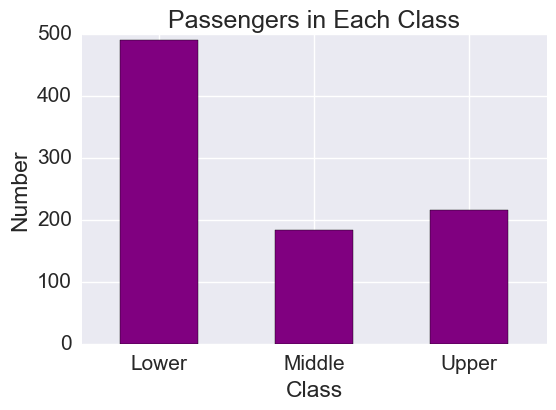

In [50]:
# Group the data by class and shows chart of amount of passengers in each class
groupby_class = titanic_data_cleaned.groupby('Pclass')
plot_8 = groupby_class['PassengerId'].count().plot(kind='bar', color='purple', rot=0)
plot_8.set_xlabel('Class')
plot_8.set_ylabel('Number')
plot_8.set_title('Passengers in Each Class');

In [51]:
# Counts the number of people in each class that were onboard 
def get_num_class(column, status):
    number_in_class = titanic_data_cleaned[titanic_data_cleaned[column] == status]
    return len(number_in_class)

num_lower_class = get_num_class('Pclass', 'Lower')
num_middle_class = get_num_class('Pclass', 'Middle')
num_upper_class = get_num_class('Pclass', 'Upper')

print 'The number of people that were in the lower, middle and upper class was {}, {} and {} respectively.'.format(num_lower_class, 
                                                                                                                   num_middle_class, 
                                                                                                                   num_upper_class)

The number of people that were in the lower, middle and upper class was 491, 184 and 216 respectively.


As seen above there were alot more lower class passengers onboard the titanic than there were middle or upper class.

Let us now dive deeper, by taking a look at the survivors and non-survivors between the different ages of the three classes.

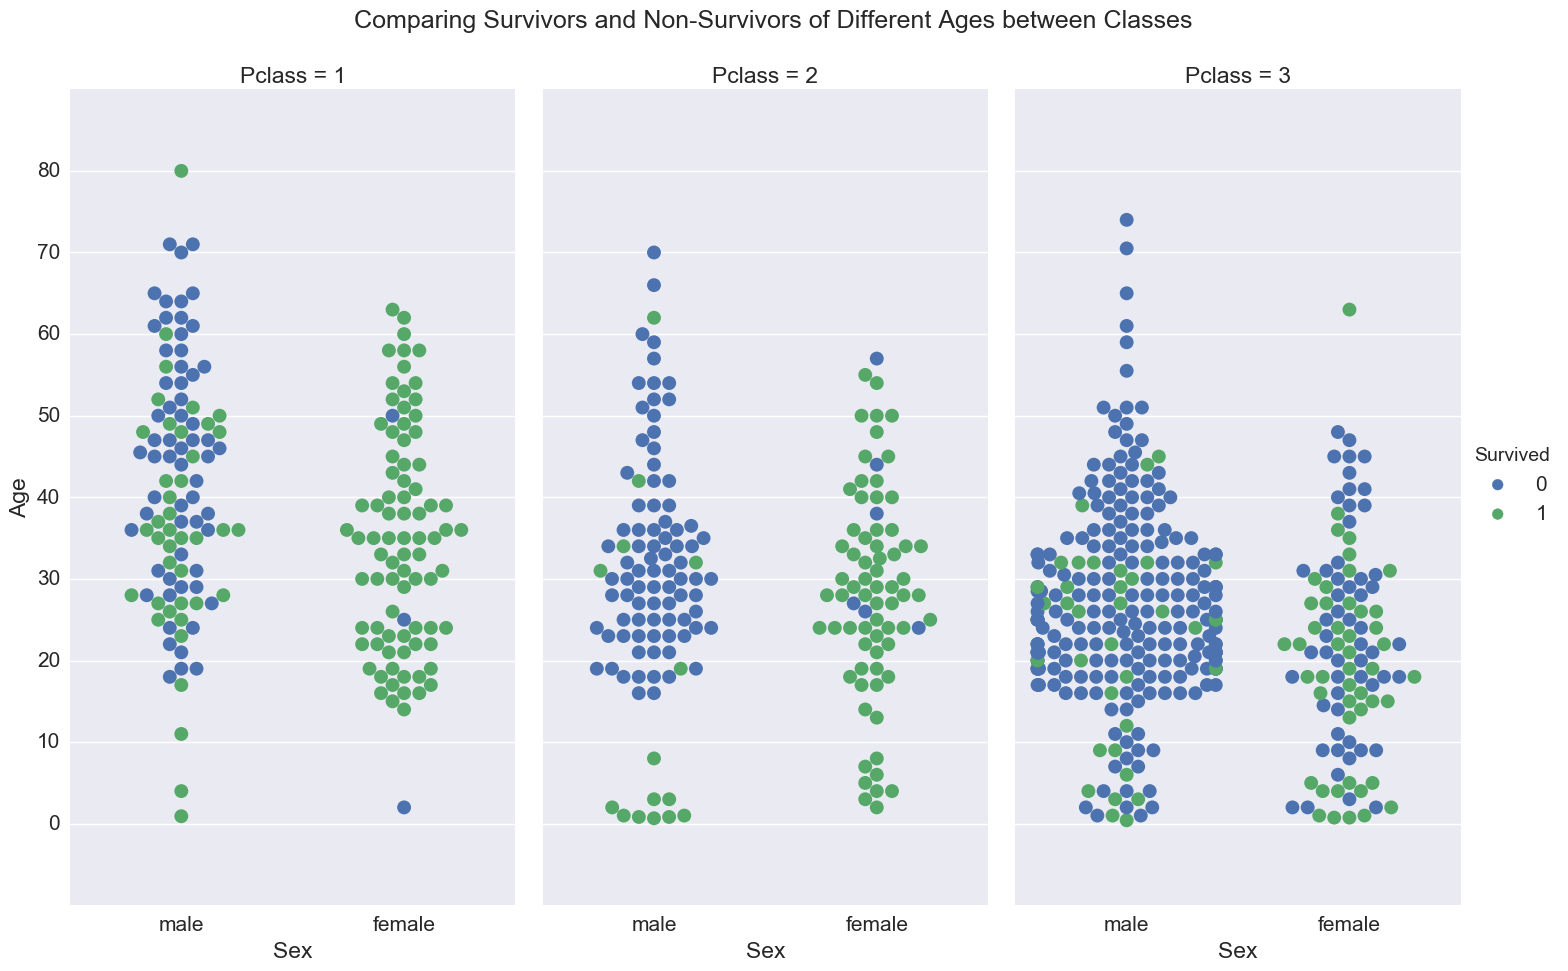

In [47]:
plot_9 = sns.factorplot(col='Pclass', x='Sex', y='Age', hue='Survived', data=titanic_data, kind='swarm', size=10, aspect=0.5, s=10, legend=True)
sns.set(font_scale=1.5)
plt.yticks([0,10,20,30,40,50,60,70,80])
plt.subplots_adjust(top=0.9)
plot_9.fig.suptitle('Comparing Survivors and Non-Survivors of Different Ages between Classes');

The swarmplot above clearly shows that female first and second class passengers had the most survivors. The survivor rate of males in all three classes are low, especially male third class passengers. Let us take a look at a barchart to confirm this interpretation, after which some some calculations will be done for qunatitative assurances. 

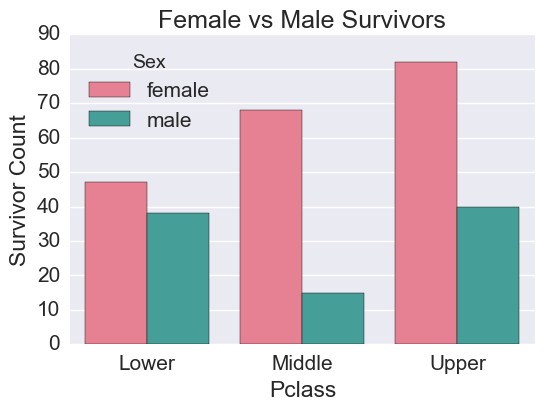

In [102]:
# Barchart comparing the survival rate of males and females of the differen classes
plot_10 = sns.countplot(x='Pclass', hue='Sex', data=titanic_survivor, order = ['Lower', 'Middle', 'Upper'], 
                        palette='husl')
plot_10.set_title('Female vs Male Survivors')
plot_10.set_ylabel('Survivor Count');

In [99]:
# Function that calculates the percentage of survivors over the total number of female or male passengers from a given class
titanic_survivor_2 = titanic_data_cleaned[titanic_data_cleaned['Survived'] == 1]

def get_surv_percent(tier, sex):
    survivors = len(titanic_survivor_2[(titanic_survivor_2['Pclass'] == tier) & (titanic_survivor_2['Sex'] == sex)])
    total = len(titanic_data_cleaned[(titanic_data_cleaned['Pclass'] == tier) & (titanic_data_cleaned['Sex'] == sex)])
    percent = (float(survivors)/total)*100
    return round(percent, 2)

female_upper_class_surv = get_surv_percent('Upper', 'female')
female_middle_class_surv = get_surv_percent('Middle', 'female')
female_lower_class_surv = get_surv_percent('Lower', 'female')

male_upper_class_surv = get_surv_percent('Upper', 'male')
male_middle_class_surv = get_surv_percent('Middle', 'male')
male_lower_class_surv = get_surv_percent('Lower', 'male')

print 'Number of surviving passengers in each class:'
print groupby_class['Survived'].sum()
print''
print 'Upper Class:'
print '{}% of upper class females survived.'.format(female_upper_class_surv)
print '{}% of upper class males survived.'.format(male_upper_class_surv)
print ''
print 'Middle Class:'
print '{}% of middle class females survived.'.format(female_middle_class_surv)
print '{}% of middle class males survived.'.format(male_middle_class_surv)
print ''
print 'Lower Class:'
print '{}% of lower class females survived.'.format(female_lower_class_surv)
print'{}% of lower class males survived.'.format(male_lower_class_surv)

Number of surviving passengers in each class:
Pclass
Lower     119
Middle     87
Upper     136
Name: Survived, dtype: int64

Upper Class:
96.81% of upper class females survived.
36.89% of upper class males survived.

Middle Class:
92.11% of middle class females survived.
15.74% of middle class males survived.

Lower Class:
50.0% of lower class females survived.
13.54% of lower class males survived.


Passengers needed to reach the top deck of the titanic, in order, to stand any chance of escaping on one of the limited lifeboats and surviving. As seen in the calculations and the plots above, female upper class passengers had the highest survival rate, which makes sense because they were closest to the upper deck and would have had an easier time making it to the lifeboats as compared to the those on the lower levels.

Lower class passengers who were the closest to the floodings and furthest from the top deck, had a higher probability of being drowned or frozen to death. Howeverf, 50% of lower class females survived as compared to only 13.54% of lower class males. This further confirms the theory that females had priority when it came to boarding the lifeboats. Let us take a look at the overall survival rate of each class, as the above calculations does not depicts a clear picture in this area.

In [100]:
# Finding the percentage of people from each class that survived
def get_survivors(pclass, tier):
    titanic_class = titanic_data_cleaned[titanic_data_cleaned[pclass] == tier]
    survivors = titanic_class[titanic_class['Survived'] == 1]
    return len(survivors)

def get_percent_class(survived, total):
    percentage_class = (float(survived)/total)*100
    return round(percentage_class, 2)

num_lower_class = get_num_class('Pclass', 'Lower')
num_middle_class = get_num_class('Pclass', 'Middle')
num_upper_class = get_num_class('Pclass', 'Upper')

surv_lower_class = get_survivors('Pclass', 'Lower')
surv_middle_class = get_survivors('Pclass', 'Middle')
surv_upper_class = get_survivors('Pclass', 'Upper')

perc_lower_surv = get_percent_class(surv_lower_class, num_lower_class)
perc_middle_surv = get_percent_class(surv_middle_class, num_middle_class)
perc_upper_surv = get_percent_class(surv_upper_class, num_upper_class)

print '{}% of lower class passengers survived.'.format(perc_lower_surv)
print '{}% of middle class passengers survived.'.format(perc_middle_surv)
print '{}% of upper class passengers survived'.format(perc_upper_surv)

24.24% of lower class passengers survived.
47.28% of middle class passengers survived.
62.96% of upper class passengers survived


As seen in the survival percentages, there seems to be a negative correlation, between class and survival. This means that as your class increases from 1, in the data, to 3, your chances of survival decreases. 

In [101]:
# Calculates the correlation between classes and survival rate rounded off to 2 decimal places
surv_and_class = round(titanic_data_cleaned['Survived'].corr(titanic_data['Pclass']), 2)
print 'The correlation between classes and survival of passengers is {}.'.format(surv_and_class)

The correlation between classes and survival of passengers is -0.34.


Calculation produced a correlation coefficient of -0.34. This shows that there was a negative correlation and that the strength of the association between class and survival is medium.

## <u> Question 4 - Children Survivors with Parents vs Nannies </u>

In [35]:
# Calculates the number of children travelling with nannies and parents respectively
child_with_nannies = len(titanic_data_cleaned[(titanic_data_cleaned['Age_category'] == 'Child') & (titanic_data_cleaned['Parch'] == 0)])
child_with_parents = len(titanic_data_cleaned[(titanic_data_cleaned['Age_category'] == 'Child') & (titanic_data_cleaned['Parch'] > 0)])

print 'The number of children onboard travelling with nannies was {}.'.format(child_with_nannies)
print 'The number of children onboard travelling with parents was {}'.format(child_with_parents)

The number of children onboard travelling with nannies was 32.
The number of children onboard travelling with parents was 81


As seen above, there were more children onboard, travelling with their parents than nannies. Let us now take look at survival rate for each group.

In [36]:
# Calculates the number of child survivors travelling with their nannies and parents respectively
surv_child_with_nannies = len(titanic_survivor[(titanic_survivor['Age_category'] == 'Child') & (titanic_survivor['Parch'] == 0)])
surv_child_with_parents = len(titanic_survivor[(titanic_survivor['Age_category'] == 'Child') & (titanic_survivor['Parch'] > 0)]) 

print 'The number of children onboard travelling with nannies that survived was {}'.format(surv_child_with_nannies)
print 'The number of children onboard travelling with parents that survived was {}'.format(surv_child_with_parents)

The number of children onboard travelling with nannies that survived was 16
The number of children onboard travelling with parents that survived was 45


In [37]:
# Calculates the percentage of children from each of the two groups that survived
perc_child_with_nannies = float(surv_child_with_nannies)/child_with_nannies*100
perc_child_with_parents = float(surv_child_with_parents)/child_with_parents*100

print '{}% of children who were travelling with their nannies survived.'.format(round(perc_child_with_nannies, 2))
print '{}% of children who were travelling with their parents survived.'.format(round(perc_child_with_parents, 2))

50.0% of children who were travelling with their nannies survived.
55.56% of children who were travelling with their parents survived.


It is difficult to draw any relevant and meaningful conclusions, based on the percentage of children from each group that survived as, there was only a slightly higher percentage of children travelling with their parents who survived.

## <u>Step 4 - Conclusion</u>

### Limitations

The dataset used contained only information of 891 out of the 2224 that were onboard the titanic, hence, the above analysis and the conclusions about to be made are tentative and may not depict or be the same should the entire dataset have been used. There were many NaN values in particular rows and columns, which may have altered the results to a certain extent.

The data alone cannot describe many events that happened on that very fateful night. For example, passengers who might have survived had they not given up. According reports on the Titanic, many of the lifeboats were not utilized to maximum capacity, certain middle and lower class passengers may have also been forcefully denied entry onto the upper decks where people had the most chance to survive. Factors such as the decisions made and the chain of events that happened also need to be analyzed and whether it would have affected the overall survival rate, by for example, giving the crew more time to prepare and passengers to get aboard the lifeboats so that the maximum number of lives could be saved.

### Result

In conclusion, the maximum chance you had as a passenger onboard the titanic was if you were a female first class passenger with nearly all of them making it off alive at 96.81%. As per the analysis above, sex was one of the factors that contributed to your survival aboard the titanic, with more female passengers making it off alive as compared to males at 233 and 109 respectively. At a medium strengthed negative correlation of -0.34, the class you were in determined your chances at survival with the upper class having a significantly higher chance. Age had a weak negative correlation of -0.08 and there was only a slightly higher chance that you would survive as a child with your parents as compared to with nannies.

## <u>References</u>

1) [https://www.kaggle.com/c/titanic/data](https://www.kaggle.com/c/titanic/data) <br>
2) [https://github.com/jasonicarter/DAND_Titanic_Data_Analysis/blob/master/TitanicData.ipynb](https://github.com/jasonicarter/DAND_Titanic_Data_Analysis/blob/master/TitanicData.ipynb)